In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

from statistical_analysis import *

In [2]:
movie_genre = pd.read_parquet("files/final_files/movie/02_movie_genre.parquet")
drama_genre = pd.read_parquet("files/final_files/drama/01_drama_genre.parquet")

hit_score = pd.read_parquet("files/final_files/00_hit_score.parquet")

movie = pd.read_parquet("files/final_files/movie/00_movie_main.parquet")
drama = pd.read_parquet("files/final_files/drama/00_drama_main.parquet")

movie_country = pd.read_parquet("files/final_files/movie/04_movie_country.parquet")
drama_country = pd.read_parquet("files/final_files/drama/02_drama_country.parquet")

movie_provider = pd.read_parquet("files/final_files/movie/05_movie_provider.parquet")
drama_provider = pd.read_parquet("files/final_files/drama/06_drama_provider.parquet")

movie_topic = pd.read_parquet("files/final_files/embedding/00_movie_topic.parquet")
drama_topic = pd.read_parquet("files/final_files/embedding/00_drama_topic.parquet")

movie_hit_topic = pd.read_parquet("files/final_files/embedding/hit_movie_topics.parquet")
movie_hit_topic = movie_hit_topic[['imdb_id', 'topic']]
drama_hit_topic = pd.read_parquet("files/final_files/embedding/hit_drama_topics.parquet")
drama_hit_topic = drama_hit_topic[['imdb_id', 'topic']]

movie_hit_score = hit_score[hit_score['imdb_id'].isin(movie['imdb_id'])].copy()
drama_hit_score = hit_score[~hit_score['imdb_id'].isin(movie['imdb_id'])].copy()

movie_hit_score['is_hit'] = np.where(movie_hit_score['hit_score'] > np.quantile(movie_hit_score['hit_score'], 0.8), 1, 0)
drama_hit_score['is_hit'] = np.where(drama_hit_score['hit_score'] > np.quantile(drama_hit_score['hit_score'], 0.8), 1, 0)


In [15]:
df_m_genre = pd.merge(movie_genre, movie_hit_score, on="imdb_id")
df_d_genre = pd.merge(drama_genre, drama_hit_score, on="imdb_id")

In [22]:
df_d_genre.groupby(
    'genre'
)['is_hit'].mean()*100

genre
Action & Adventure    24.036281
Comedy                25.974026
Crime                 21.327530
Drama                 20.018709
Family                16.470588
Mystery               16.811594
Sci-Fi & Fantasy      21.675774
Soap                   0.000000
War & Politics        30.769231
Western               32.142857
Name: is_hit, dtype: float64

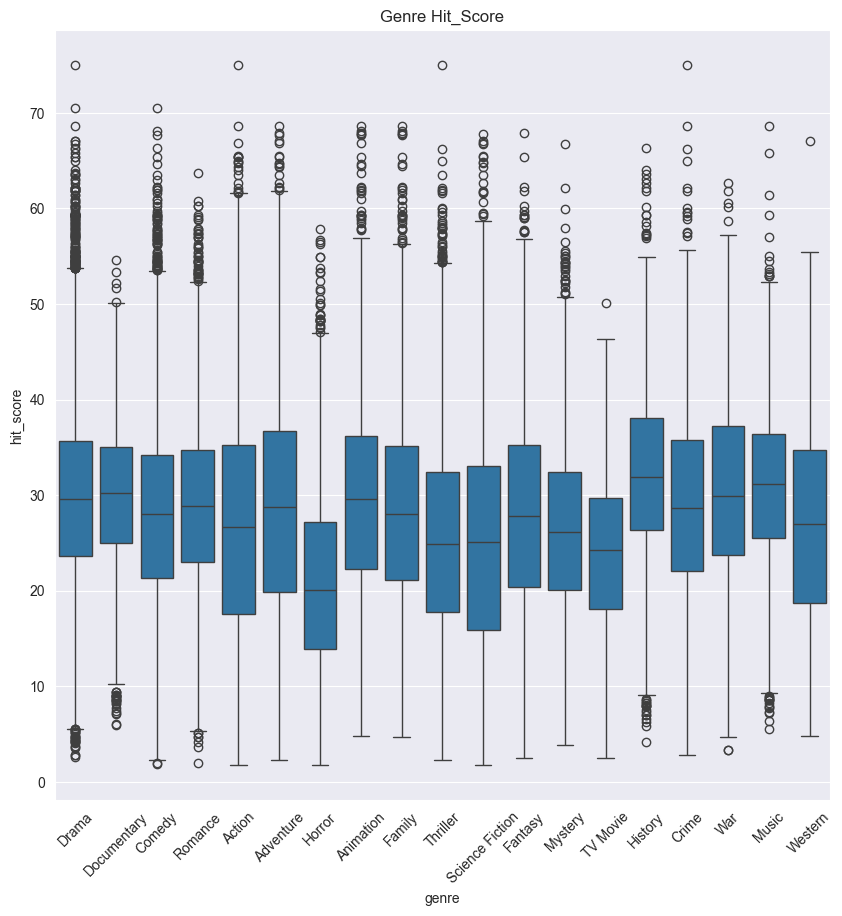

In [5]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_m_genre, x="genre", y="hit_score")
plt.xticks(rotation=45)
plt.title("Genre Hit_Score")
plt.show()

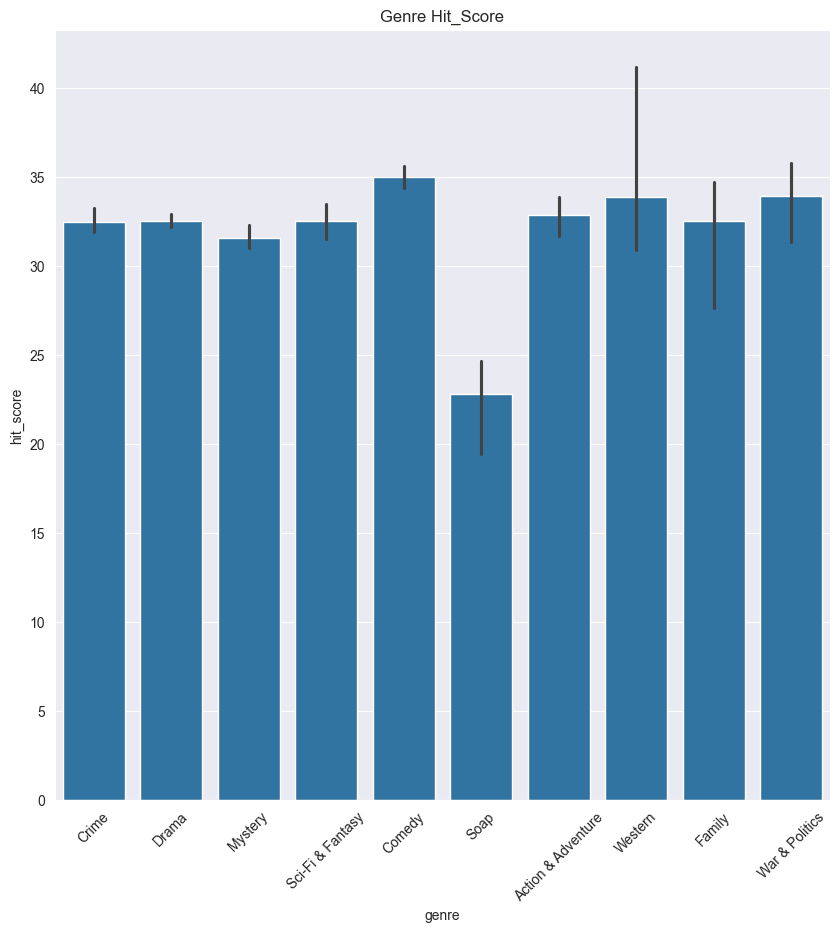

In [6]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_d_genre, x="genre", y="hit_score", estimator=np.median)
plt.xticks(rotation=45)
plt.title("Genre Hit_Score")
plt.show()

In [8]:
pre_test(df_m_genre, 'genre')

등분산성을 만족하지 않음
정규성을 만족하지 않음


In [9]:
pre_test(df_d_genre, 'genre')

등분산성을 만족하지 않음
정규성을 만족하지 않음


In [11]:
kruskal_test(df_d_genre, 'genre')

Kruskal-Wallis H 검정: genre → hit_score

그룹 수: 10
전체 샘플: 6,795

          category    n    median      mean       std       min       max
             Crime  919 32.502854 33.417187  9.393484  7.156173 66.691607
             Drama 3207 32.528861 32.958195  9.129280  6.069949 66.691607
           Mystery  690 31.563457 32.309024  8.802207  6.069949 63.251615
  Sci-Fi & Fantasy  549 32.534658 33.232390  9.045165  8.331273 63.251615
            Comedy  693 35.041754 35.244054  8.402809  7.237566 61.463387
              Soap   79 22.835217 22.247911  8.691824  6.069949 39.958275
Action & Adventure  441 32.902123 33.511955  9.647784  7.169440 62.534969
           Western   28 33.887104 36.223397  8.880399 23.652793 51.400956
            Family   85 32.529581 30.216523 11.255121  6.788203 58.131695
    War & Politics  104 33.939896 34.595712  8.917166 11.743105 58.684592

------------------------------------------------------------
검정 결과:
------------------------------------------------------

{'H': np.float64(153.9008436540795),
 'p_value': np.float64(1.3705454262743241e-28),
 'dof': 9,
 'epsilon_squared': np.float64(0.02135605654444797),
 'eta_squared': np.float64(0.022652464476608698),
 'effect_interpretation': '작음 (small)',
 'significant': np.True_,
 'groups': ['Crime',
  'Drama',
  'Mystery',
  'Sci-Fi & Fantasy',
  'Comedy',
  'Soap',
  'Action & Adventure',
  'Western',
  'Family',
  'War & Politics'],
 'group_stats':              category     n     median       mean        std        min  \
 0               Crime   919  32.502854  33.417187   9.393484   7.156173   
 1               Drama  3207  32.528861  32.958195   9.129280   6.069949   
 2             Mystery   690  31.563457  32.309024   8.802207   6.069949   
 3    Sci-Fi & Fantasy   549  32.534658  33.232390   9.045165   8.331273   
 4              Comedy   693  35.041754  35.244054   8.402809   7.237566   
 5                Soap    79  22.835217  22.247911   8.691824   6.069949   
 6  Action & Adventure   441 

In [12]:
kruskal_test(df_m_genre, 'genre')

Kruskal-Wallis H 검정: genre → hit_score

그룹 수: 19
전체 샘플: 60,207

       category     n    median      mean       std      min       max
          Drama 11739 29.575702 29.805304  9.715613 2.605824 74.984362
    Documentary  1730 30.250166 29.804044  8.017993 5.984877 54.603522
         Comedy  8251 28.014211 27.822524 10.187952 1.929062 70.528902
        Romance  4139 28.832606 28.946438  9.309825 1.936792 63.713538
         Action  4524 26.697890 26.857079 12.084687 1.751206 74.984362
      Adventure  2435 28.733347 28.905141 12.415873 2.284956 68.680688
         Horror  4196 20.139659 20.937789  9.435016 1.751206 57.879737
      Animation  1556 29.557960 29.750914 11.301806 4.809018 68.680688
         Family  1961 28.041994 28.586268 11.141282 4.750680 68.680688
       Thriller  6149 24.880152 25.474503 10.595163 2.318450 74.984362
Science Fiction  2069 25.092740 25.368839 12.371991 1.751206 67.762630
        Fantasy  1962 27.851578 28.043048 11.086077 2.518919 67.883042
        Myste

{'H': np.float64(3570.758894377912),
 'p_value': np.float64(0.0),
 'dof': 18,
 'epsilon_squared': np.float64(0.059027694795937925),
 'eta_squared': np.float64(0.05930902060223087),
 'effect_interpretation': '작음 (small)',
 'significant': np.True_,
 'groups': ['Drama',
  'Documentary',
  'Comedy',
  'Romance',
  'Action',
  'Adventure',
  'Horror',
  'Animation',
  'Family',
  'Thriller',
  'Science Fiction',
  'Fantasy',
  'Mystery',
  'TV Movie',
  'History',
  'Crime',
  'War',
  'Music',
  'Western'],
 'group_stats':            category      n     median       mean        std       min  \
 0             Drama  11739  29.575702  29.805304   9.715613  2.605824   
 1       Documentary   1730  30.250166  29.804044   8.017993  5.984877   
 2            Comedy   8251  28.014211  27.822524  10.187952  1.929062   
 3           Romance   4139  28.832606  28.946438   9.309825  1.936792   
 4            Action   4524  26.697890  26.857079  12.084687  1.751206   
 5         Adventure   2435  28.

In [20]:
chi_square_test(df_m_genre, 'genre', 'is_hit')


Chi-squared 독립성 검정 결과
독립변수: genre
종속변수: is_hit
샘플 크기: 60,207
교차표 크기: 19 × 2
------------------------------------------------------------
Chi-squared 통계량: 1281.9727
자유도 (dof): 18
p-value: 0.000000 (< 0.001)
유의수준 (α): 0.05
------------------------------------------------------------
Cramér's V: 0.1459
효과 크기 해석: 작음 (small)
------------------------------------------------------------
✅ 결과: 통계적으로 유의함 (p < 0.05)
   → genre과(와) is_hit은(는) 독립적이지 않음



{'chi2': np.float64(1281.9727461919674),
 'p_value': np.float64(3.005182374429925e-261),
 'dof': 18,
 'cramers_v': np.float64(0.14592036335142766),
 'effect_size': np.float64(0.14592036335142766),
 'effect_interpretation': '작음 (small)',
 'significant': np.True_,
 'alpha': 0.05,
 'crosstab': is_hit              0     1
 genre                      
 Action           3437  1087
 Adventure        1742   693
 Animation        1138   418
 Comedy           6546  1705
 Crime            2235   756
 Documentary      1337   393
 Drama            8802  2937
 Family           1500   461
 Fantasy          1495   467
 History           791   417
 Horror           3907   289
 Music             606   233
 Mystery          1686   340
 Romance          3232   907
 Science Fiction  1673   396
 TV Movie         1499    92
 Thriller         5096  1053
 War               460   198
 Western           142    41,
 'expected': array([[3555.96153271,  968.03846729],
        [1913.96249606,  521.03750394],
       

In [21]:
chi_square_test(df_d_genre, 'genre', 'is_hit')

Chi-squared 독립성 검정 결과
독립변수: genre
종속변수: is_hit
샘플 크기: 6,795
교차표 크기: 10 × 2
------------------------------------------------------------
Chi-squared 통계량: 52.4853
자유도 (dof): 9
p-value: 0.000000 (< 0.001)
유의수준 (α): 0.05
------------------------------------------------------------
Cramér's V: 0.0879
효과 크기 해석: 무시 가능 (negligible)
------------------------------------------------------------
✅ 결과: 통계적으로 유의함 (p < 0.05)
   → genre과(와) is_hit은(는) 독립적이지 않음



{'chi2': np.float64(52.48532663582634),
 'p_value': np.float64(3.658754586753559e-08),
 'dof': 9,
 'cramers_v': np.float64(0.08788691529562564),
 'effect_size': np.float64(0.08788691529562564),
 'effect_interpretation': '무시 가능 (negligible)',
 'significant': np.True_,
 'alpha': 0.05,
 'crosstab': is_hit                 0    1
 genre                        
 Action & Adventure   335  106
 Comedy               513  180
 Crime                723  196
 Drama               2565  642
 Family                71   14
 Mystery              574  116
 Sci-Fi & Fantasy     430  119
 Soap                  79    0
 War & Politics        72   32
 Western               19    9,
 'expected': array([[ 349.23046358,   91.76953642],
        [ 548.79072848,  144.20927152],
        [ 727.76144224,  191.23855776],
        [2539.6419426 ,  667.3580574 ],
        [  67.31199411,   17.68800589],
        [ 546.41501104,  143.58498896],
        [ 434.75629139,  114.24370861],
        [  62.56055923,   16.43944077],

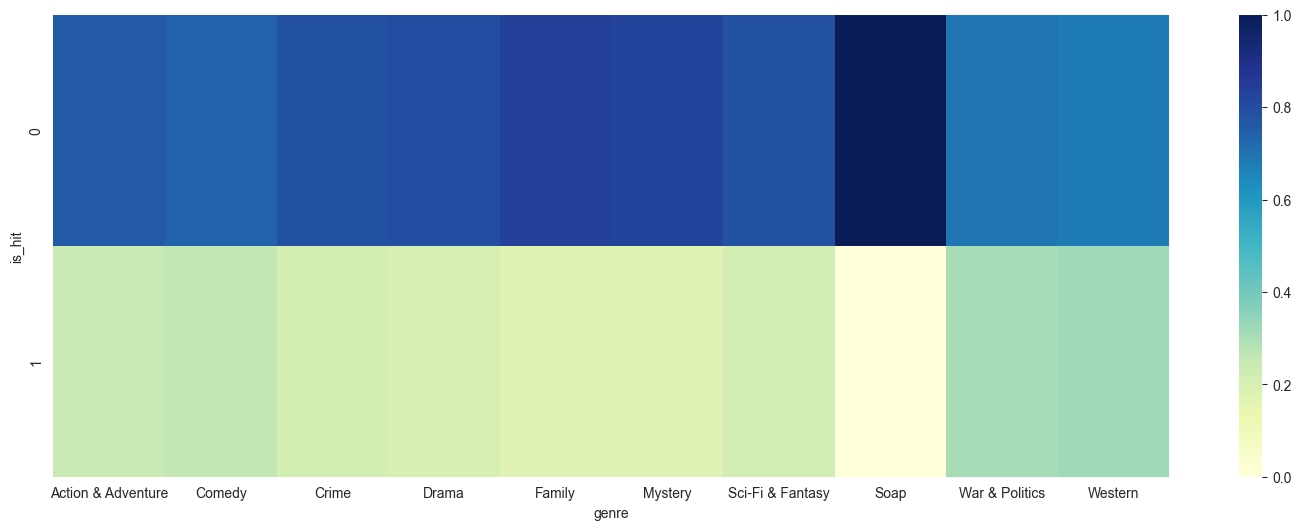

In [17]:
create_heatmap(df_d_genre, 'genre', 'is_hit')

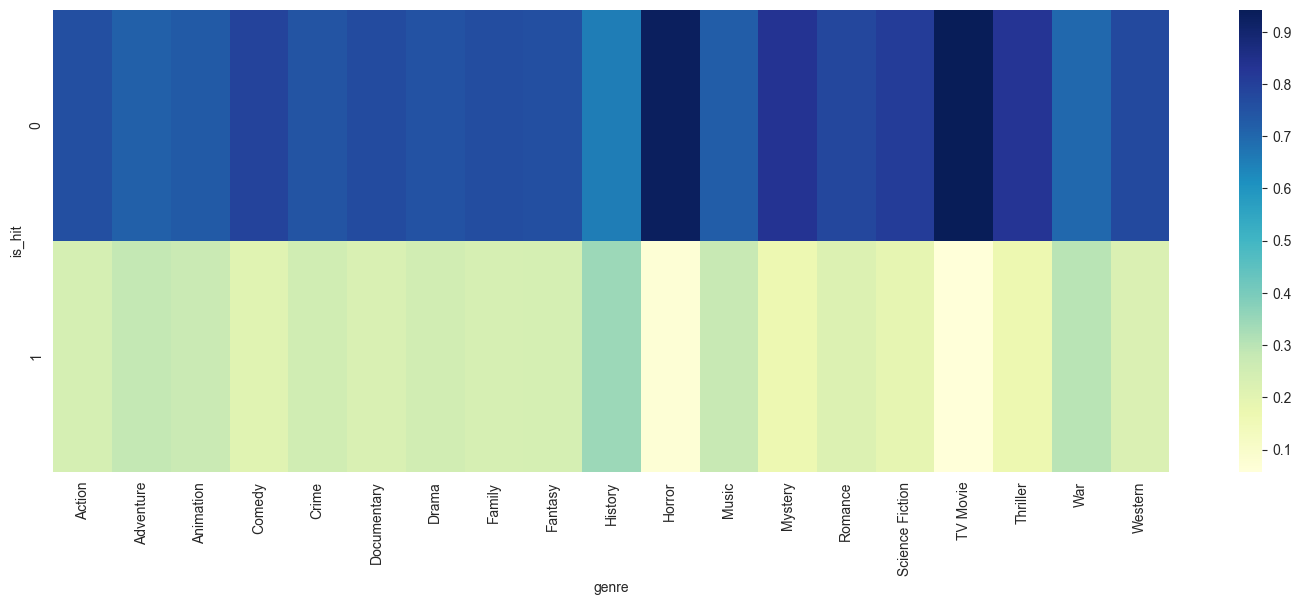

In [18]:
create_heatmap(df_m_genre, 'genre', 'is_hit')

In [3]:
df_m_county = pd.merge(movie_country, movie_hit_score, on="imdb_id")
df_d_county = pd.merge(drama_country, drama_hit_score, on="imdb_id")

In [10]:
df_d_county.groupby('origin_country')['hit_score'].median()

origin_country
ca       30.059746
cn       32.668982
co       24.939191
es       28.477061
fr       31.318476
gb       32.570668
kr       32.605619
mx       25.120742
other    31.530676
tr       35.469640
us       33.976887
Name: hit_score, dtype: float64

In [7]:
df_m_county.groupby('production_countries')['hit_score'].median()

production_countries
belgium                     28.407721
canada                      25.333517
france                      27.979104
germany                     28.780738
india                       36.030352
italy                       26.125284
japan                       28.266187
other                       27.924498
spain                       27.838189
united kingdom              30.058627
united states of america    27.635549
Name: hit_score, dtype: float64

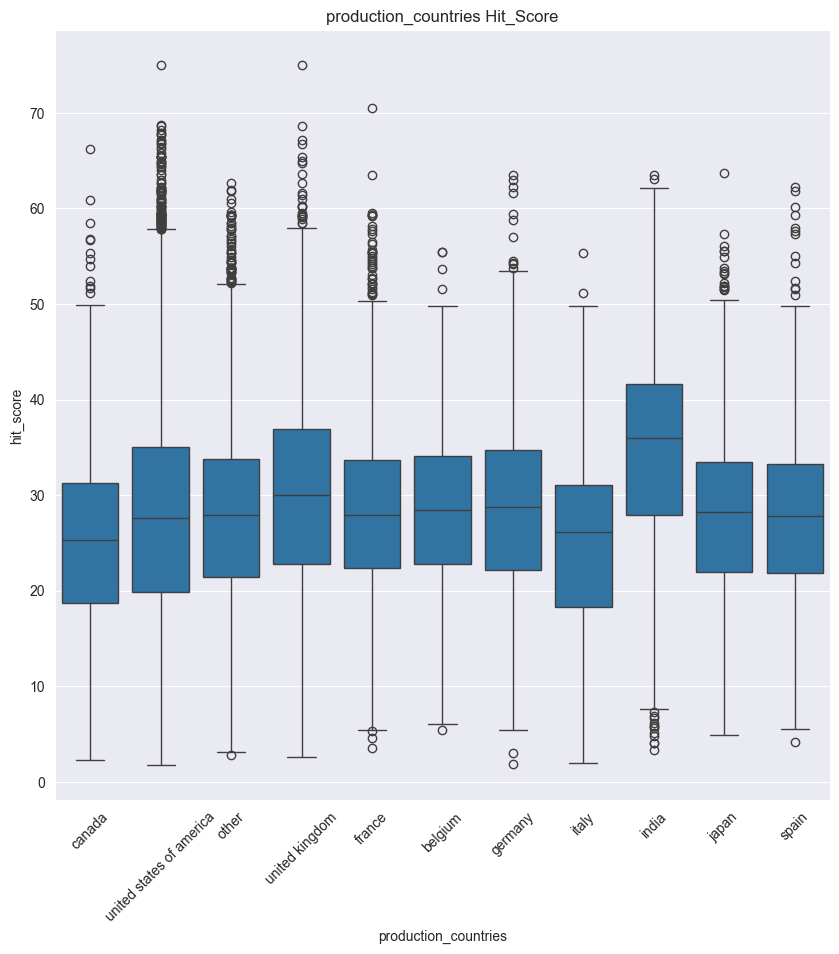

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_m_county, x="production_countries", y="hit_score")
plt.xticks(rotation=45)
plt.title("production_countries Hit_Score")
plt.show()

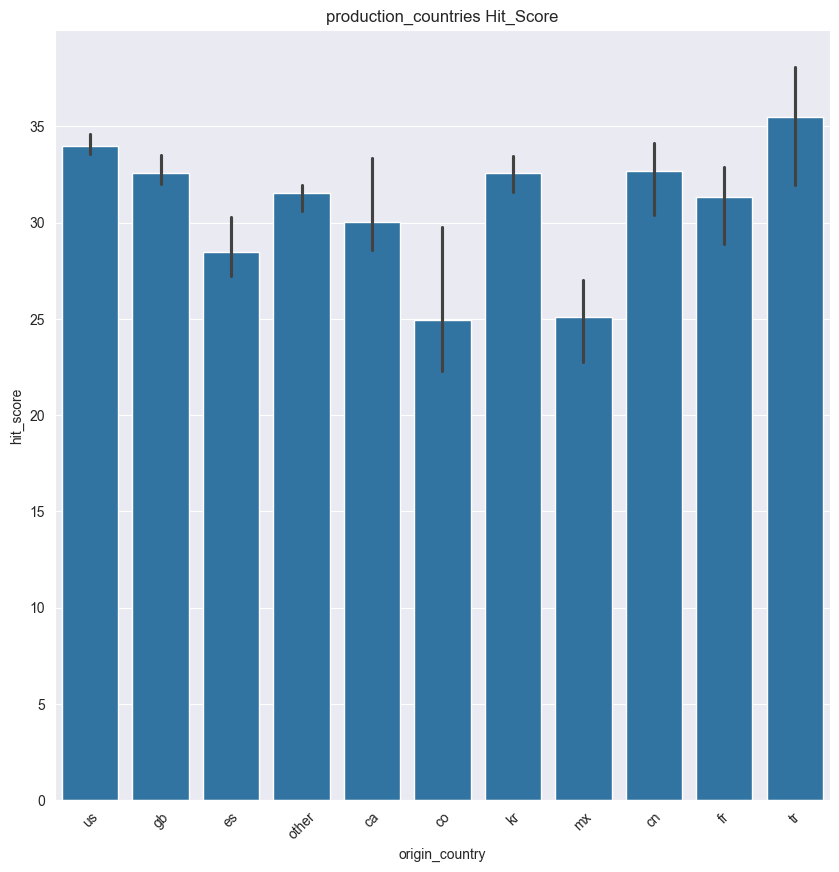

In [21]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_d_county, x="origin_country", y="hit_score", estimator= np.median)
plt.xticks(rotation=45)
plt.title("production_countries Hit_Score")
plt.show()

In [22]:
pre_test(df_m_county, 'production_countries')

등분산성을 만족하지 않음
정규성을 만족하지 않음


In [23]:
pre_test(df_d_county, 'origin_country')

등분산성을 만족하지 않음
정규성을 만족하지 않음


In [24]:
kruskal_test(df_m_county, 'production_countries')

Kruskal-Wallis H 검정: production_countries → hit_score

그룹 수: 11
전체 샘플: 34,472

                category     n    median      mean       std      min       max
                  canada  1963 25.333517 25.382369  9.170937 2.284956 66.205212
united states of america 12496 27.635549 27.844447 11.260064 1.751206 74.984362
                   other  7126 27.924498 27.571365  9.519919 2.867080 62.681697
          united kingdom  2882 30.058627 29.996995 10.966914 2.651942 74.984362
                  france  3296 27.979104 27.842221  9.276751 3.499455 70.528902
                 belgium   864 28.407721 28.134311  8.976262 5.459411 55.482779
                 germany  1568 28.780738 28.526038  9.673156 1.929062 63.460699
                   italy  1076 26.125284 24.626070  9.679915 1.936792 55.358129
                   india  1145 36.030352 34.581027 10.523984 3.363426 63.476287
                   japan  1120 28.266187 27.902618  9.316033 4.883051 63.713538
                   spain   936 27.838189 

{'H': np.float64(813.0220014502393),
 'p_value': np.float64(3.272483011980618e-168),
 'dof': 10,
 'epsilon_squared': np.float64(0.023302341819745196),
 'eta_squared': np.float64(0.023585680759195825),
 'effect_interpretation': '작음 (small)',
 'significant': np.True_,
 'groups': ['canada',
  'united states of america',
  'other',
  'united kingdom',
  'france',
  'belgium',
  'germany',
  'italy',
  'india',
  'japan',
  'spain'],
 'group_stats':                     category      n     median       mean        std  \
 0                     canada   1963  25.333517  25.382369   9.170937   
 1   united states of america  12496  27.635549  27.844447  11.260064   
 2                      other   7126  27.924498  27.571365   9.519919   
 3             united kingdom   2882  30.058627  29.996995  10.966914   
 4                     france   3296  27.979104  27.842221   9.276751   
 5                    belgium    864  28.407721  28.134311   8.976262   
 6                    germany   1568  28.

In [25]:
kruskal_test(df_d_county, 'origin_country')

Kruskal-Wallis H 검정: origin_country → hit_score

그룹 수: 11
전체 샘플: 3,321

category    n    median      mean      std       min       max
      us 1281 33.976887 34.680440 9.520361  9.103409 66.691607
      gb  438 32.570668 33.624738 8.692559 15.046595 62.741931
      es  115 28.477061 29.045434 7.510492 10.772645 47.660874
   other  594 31.530676 31.560395 9.079855  6.069949 63.251615
      ca   84 30.059746 31.188359 8.231378  8.806519 53.033515
      co   42 24.939191 25.212520 8.636997  9.410838 48.173605
      kr  437 32.605619 32.937914 7.471935  8.808499 55.405272
      mx  112 25.120742 23.820976 8.026373  6.788203 39.182484
      cn   72 32.668982 32.526287 5.709230 20.566221 47.934478
      fr   74 31.318476 30.794535 7.524697  7.156173 47.620441
      tr   72 35.469640 35.723927 8.748944 15.256032 54.233838

------------------------------------------------------------
검정 결과:
------------------------------------------------------------
H 통계량: 210.3217
p-value: 0.000000
자유도: 10


{'H': np.float64(210.32169269764992),
 'p_value': np.float64(1.1300692229693198e-39),
 'dof': 10,
 'epsilon_squared': np.float64(0.06052014885125375),
 'eta_squared': np.float64(0.06334990743905118),
 'effect_interpretation': '중간 (medium)',
 'significant': np.True_,
 'groups': ['us',
  'gb',
  'es',
  'other',
  'ca',
  'co',
  'kr',
  'mx',
  'cn',
  'fr',
  'tr'],
 'group_stats':    category     n     median       mean       std        min        max
 0        us  1281  33.976887  34.680440  9.520361   9.103409  66.691607
 1        gb   438  32.570668  33.624738  8.692559  15.046595  62.741931
 2        es   115  28.477061  29.045434  7.510492  10.772645  47.660874
 3     other   594  31.530676  31.560395  9.079855   6.069949  63.251615
 4        ca    84  30.059746  31.188359  8.231378   8.806519  53.033515
 5        co    42  24.939191  25.212520  8.636997   9.410838  48.173605
 6        kr   437  32.605619  32.937914  7.471935   8.808499  55.405272
 7        mx   112  25.120742  2

In [26]:
chi_square_test(df_m_county, 'production_countries', 'is_hit')

Chi-squared 독립성 검정 결과
독립변수: production_countries
종속변수: is_hit
샘플 크기: 34,472
교차표 크기: 11 × 2
------------------------------------------------------------
Chi-squared 통계량: 995.6305
자유도 (dof): 10
p-value: 0.000000 (< 0.001)
유의수준 (α): 0.05
------------------------------------------------------------
Cramér's V: 0.1699
효과 크기 해석: 작음 (small)
------------------------------------------------------------
✅ 결과: 통계적으로 유의함 (p < 0.05)
   → production_countries과(와) is_hit은(는) 독립적이지 않음



{'chi2': np.float64(995.6304616671891),
 'p_value': np.float64(1.6336172983037676e-207),
 'dof': 10,
 'cramers_v': np.float64(0.16994791750499252),
 'effect_size': np.float64(0.16994791750499252),
 'effect_interpretation': '작음 (small)',
 'significant': np.True_,
 'alpha': 0.05,
 'crosstab': is_hit                       0     1
 production_countries                
 belgium                    698   166
 canada                    1731   232
 france                    2702   594
 germany                   1226   342
 india                      554   591
 italy                      965   111
 japan                      914   206
 other                     5816  1310
 spain                      774   162
 united kingdom            2058   824
 united states of america  9565  2931,
 'expected': array([[ 676.79832908,  187.20167092],
        [1537.67953702,  425.32046298],
        [2581.86029241,  714.13970759],
        [1228.26363425,  339.73636575],
        [ 896.91445231,  248.08554769],
  

In [27]:
chi_square_test(df_d_county, 'origin_country', 'is_hit')

Chi-squared 독립성 검정 결과
독립변수: origin_country
종속변수: is_hit
샘플 크기: 3,321
교차표 크기: 11 × 2
------------------------------------------------------------
Chi-squared 통계량: 114.7628
자유도 (dof): 10
p-value: 0.000000 (< 0.001)
유의수준 (α): 0.05
------------------------------------------------------------
Cramér's V: 0.1859
효과 크기 해석: 작음 (small)
------------------------------------------------------------
✅ 결과: 통계적으로 유의함 (p < 0.05)
   → origin_country과(와) is_hit은(는) 독립적이지 않음



{'chi2': np.float64(114.76283699816639),
 'p_value': np.float64(5.824189811361457e-20),
 'dof': 10,
 'cramers_v': np.float64(0.18589435421736322),
 'effect_size': np.float64(0.18589435421736322),
 'effect_interpretation': '작음 (small)',
 'significant': np.True_,
 'alpha': 0.05,
 'crosstab': is_hit            0    1
 origin_country          
 ca               75    9
 cn               65    7
 co               41    1
 es              106    9
 fr               67    7
 gb              339   99
 kr              367   70
 mx              112    0
 other           499   95
 tr               46   26
 us              948  333,
 'expected': array([[  67.40740741,   16.59259259],
        [  57.77777778,   14.22222222],
        [  33.7037037 ,    8.2962963 ],
        [  92.28395062,   22.71604938],
        [  59.38271605,   14.61728395],
        [ 351.48148148,   86.51851852],
        [ 350.67901235,   86.32098765],
        [  89.87654321,   22.12345679],
        [ 476.66666667,  117.33333333],

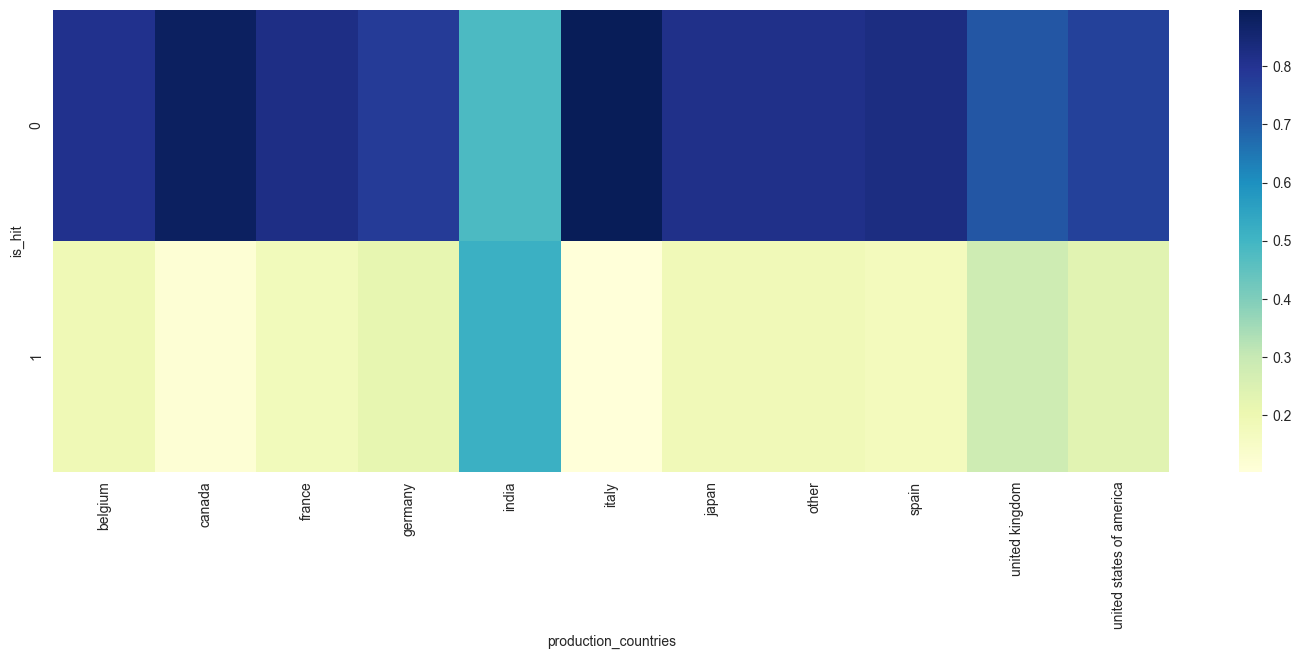

In [28]:
create_heatmap(df_m_county, 'production_countries', 'is_hit')

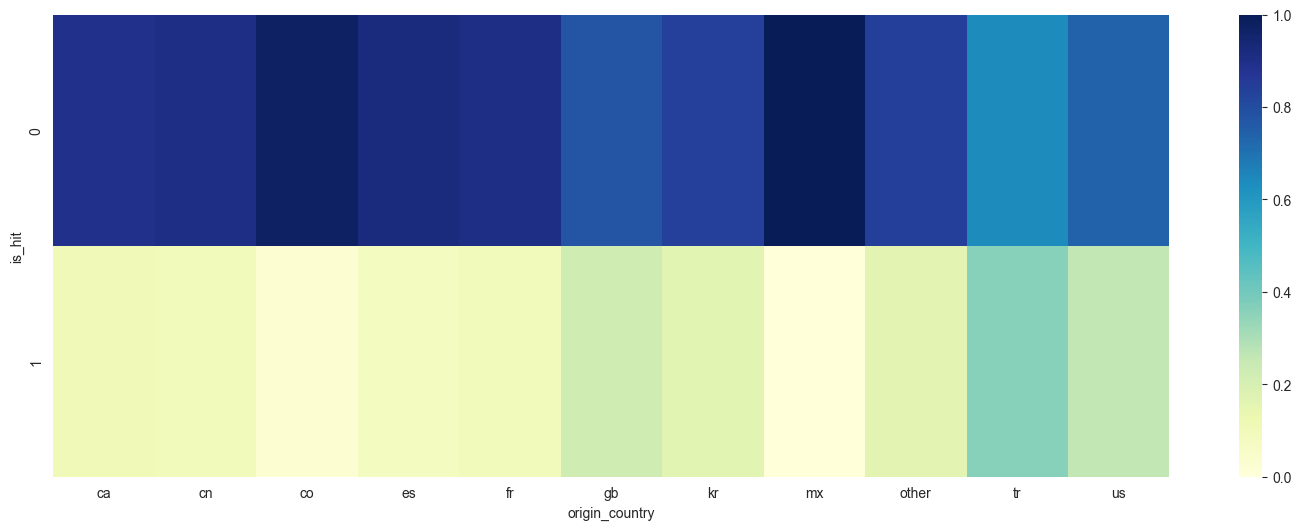

In [29]:
create_heatmap(df_d_county, 'origin_country', 'is_hit')

In [11]:
df_m_provider = pd.merge(movie_provider, movie_hit_score, on="imdb_id")
df_d_provider = pd.merge(drama_provider, drama_hit_score, on="imdb_id")

In [14]:
df_d_provider.groupby('providers_flatrate')['is_hit'].mean()

providers_flatrate
amazon prime video    0.389222
disney plus           0.434783
hbo max               0.595960
hulu                  0.459627
kinopoisk             0.622449
movistar              0.503817
netflix               0.474684
none                  0.164557
okko                  0.367925
other                 0.317293
strim                 0.613861
u-next                0.430769
Name: is_hit, dtype: float64

In [31]:
chi_square_test(df_m_provider, 'providers_flatrate', 'is_hit')

Chi-squared 독립성 검정 결과
독립변수: providers_flatrate
종속변수: is_hit
샘플 크기: 69,358
교차표 크기: 11 × 2
------------------------------------------------------------
Chi-squared 통계량: 2040.3775
자유도 (dof): 10
p-value: 0.000000 (< 0.001)
유의수준 (α): 0.05
------------------------------------------------------------
Cramér's V: 0.1715
효과 크기 해석: 작음 (small)
------------------------------------------------------------
✅ 결과: 통계적으로 유의함 (p < 0.05)
   → providers_flatrate과(와) is_hit은(는) 독립적이지 않음



{'chi2': np.float64(2040.3774708836067),
 'p_value': np.float64(0.0),
 'dof': 10,
 'cramers_v': np.float64(0.17151692387577028),
 'effect_size': np.float64(0.17151692387577028),
 'effect_interpretation': '작음 (small)',
 'significant': np.True_,
 'alpha': 0.05,
 'crosstab': is_hit                  0     1
 providers_flatrate             
 amazon prime video  10598  2975
 filmin               2044   701
 fubotv               2109   550
 hbo max              1454  1189
 kpn                  2538  1859
 movistar             2913  1661
 netflix              3955  1890
 other               15437  4308
 u-next               2293  1534
 watcha               2844  1104
 wavve                2236   737,
 'expected': array([[ 9819.63323821,  3753.36676179],
        [ 1985.92007949,   759.07992051],
        [ 1923.70181834,   735.29818166],
        [ 1912.1263279 ,   730.8736721 ],
        [ 3181.08946794,  1215.91053206],
        [ 3309.14333099,  1264.85666901],
        [ 4228.67135323,  1616.328

In [32]:
chi_square_test(df_d_provider, 'providers_flatrate', 'is_hit')

Chi-squared 독립성 검정 결과
독립변수: providers_flatrate
종속변수: is_hit
샘플 크기: 4,547
교차표 크기: 12 × 2
------------------------------------------------------------
Chi-squared 통계량: 465.5023
자유도 (dof): 11
p-value: 0.000000 (< 0.001)
유의수준 (α): 0.05
------------------------------------------------------------
Cramér's V: 0.3200
효과 크기 해석: 중간 (medium)
------------------------------------------------------------
✅ 결과: 통계적으로 유의함 (p < 0.05)
   → providers_flatrate과(와) is_hit은(는) 독립적이지 않음



{'chi2': np.float64(465.50234481672777),
 'p_value': np.float64(7.2118806063003175e-93),
 'dof': 11,
 'cramers_v': np.float64(0.3199620416845093),
 'effect_size': np.float64(0.3199620416845093),
 'effect_interpretation': '중간 (medium)',
 'significant': np.True_,
 'alpha': 0.05,
 'crosstab': is_hit                 0    1
 providers_flatrate           
 amazon prime video   204  130
 disney plus           65   50
 hbo max               40   59
 hulu                  87   74
 kinopoisk             37   61
 movistar              65   66
 netflix               83   75
 none                2046  403
 okko                  67   39
 other                454  211
 strim                 39   62
 u-next                74   56,
 'expected': array([[ 239.53683748,   94.46316252],
        [  82.47525841,   32.52474159],
        [  71.00043985,   27.99956015],
        [ 115.46536178,   45.53463822],
        [  70.28326369,   27.71673631],
        [  93.95007697,   37.04992303],
        [ 113.3138333 ,

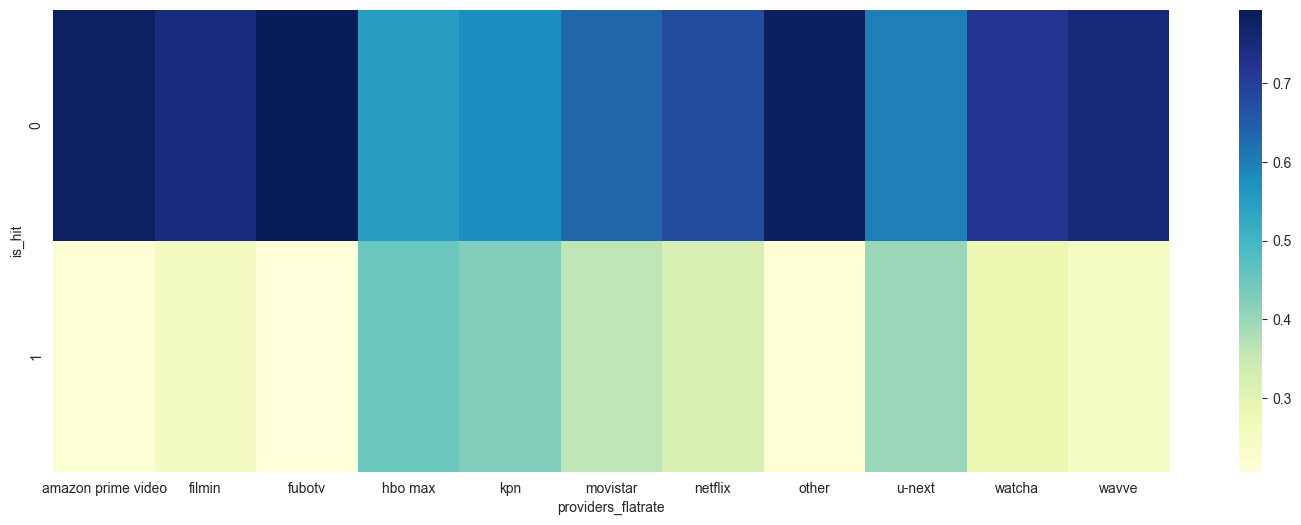

In [33]:
create_heatmap(df_m_provider, 'providers_flatrate', 'is_hit')

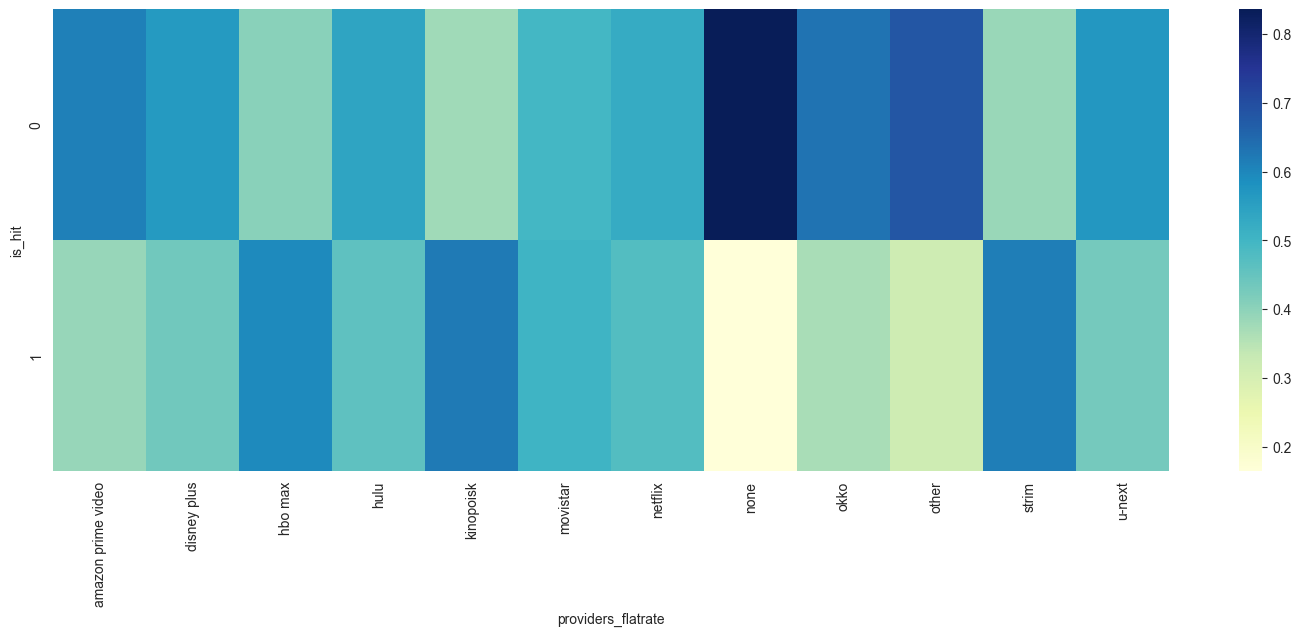

In [34]:
create_heatmap(df_d_provider, 'providers_flatrate', 'is_hit')

In [35]:
pd.read_parquet("files/final_files/drama/00_drama_main.parquet").shape

(3317, 32)

In [36]:
df_m_topic = movie_topic.merge(movie_hit_score, on="imdb_id", how="inner")
df_d_topic = drama_topic.merge(drama_hit_score, on="imdb_id", how="inner")

In [37]:
df_m_topic_r = chi_square_test(df_m_topic, 'topic', 'is_hit')
df_d_topic_r = chi_square_test(df_d_topic, 'topic', 'is_hit')

Chi-squared 독립성 검정 결과
독립변수: topic
종속변수: is_hit
샘플 크기: 26,064
교차표 크기: 21 × 2
------------------------------------------------------------
Chi-squared 통계량: 856.6296
자유도 (dof): 20
p-value: 0.000000 (< 0.001)
유의수준 (α): 0.05
------------------------------------------------------------
Cramér's V: 0.1813
효과 크기 해석: 작음 (small)
------------------------------------------------------------
✅ 결과: 통계적으로 유의함 (p < 0.05)
   → topic과(와) is_hit은(는) 독립적이지 않음

Chi-squared 독립성 검정 결과
독립변수: topic
종속변수: is_hit
샘플 크기: 3,207
교차표 크기: 21 × 2
------------------------------------------------------------
Chi-squared 통계량: 62.7109
자유도 (dof): 20
p-value: 0.000003 (< 0.001)
유의수준 (α): 0.05
------------------------------------------------------------
Cramér's V: 0.1398
효과 크기 해석: 작음 (small)
------------------------------------------------------------
✅ 결과: 통계적으로 유의함 (p < 0.05)
   → topic과(와) is_hit은(는) 독립적이지 않음



In [62]:
create_crosstab(df_m_topic, 'topic', 'is_hit').sort_values(1, ascending=False)

is_hit,0,1
topic,,
2,0.682282,0.317718
13,0.717757,0.282243
10,0.726154,0.273846
16,0.730769,0.269231
18,0.731993,0.268007
1,0.746572,0.253428
11,0.753731,0.246269
19,0.758273,0.241727
17,0.763934,0.236066


In [61]:
create_crosstab(df_m_topic, 'topic', 'is_hit')[1]*100

topic
-1     19.620253
 0     20.265957
 1     25.342841
 2     31.771772
 3     22.630458
 4     12.219731
 5     17.870885
 6      5.019305
 7     22.622478
 8      6.889891
 9     20.547945
 10    27.384615
 11    24.626866
 12    10.357143
 13    28.224299
 14     6.065574
 15    19.227540
 16    26.923077
 17    23.606557
 18    26.800670
 19    24.172662
Name: 1, dtype: float64

In [39]:
create_crosstab(df_d_topic, 'topic', 'is_hit').sort_values(1, ascending=False)

is_hit,0,1
topic,,
7,0.718954,0.281046
6,0.724409,0.275591
19,0.746032,0.253968
12,0.747126,0.252874
9,0.756757,0.243243
2,0.760369,0.239631
4,0.763736,0.236264
0,0.766284,0.233716
16,0.770833,0.229167


In [63]:
create_crosstab(df_d_topic, 'topic', 'is_hit')[1]*100

topic
-1     20.000000
 0     23.371648
 1     18.354430
 2     23.963134
 3     13.714286
 4     23.626374
 5     13.071895
 6     27.559055
 7     28.104575
 8      4.411765
 9     24.324324
 10     3.921569
 11    20.000000
 12    25.287356
 13    17.272727
 14    10.447761
 15    15.384615
 16    22.916667
 17    22.619048
 18    15.068493
 19    25.396825
Name: 1, dtype: float64

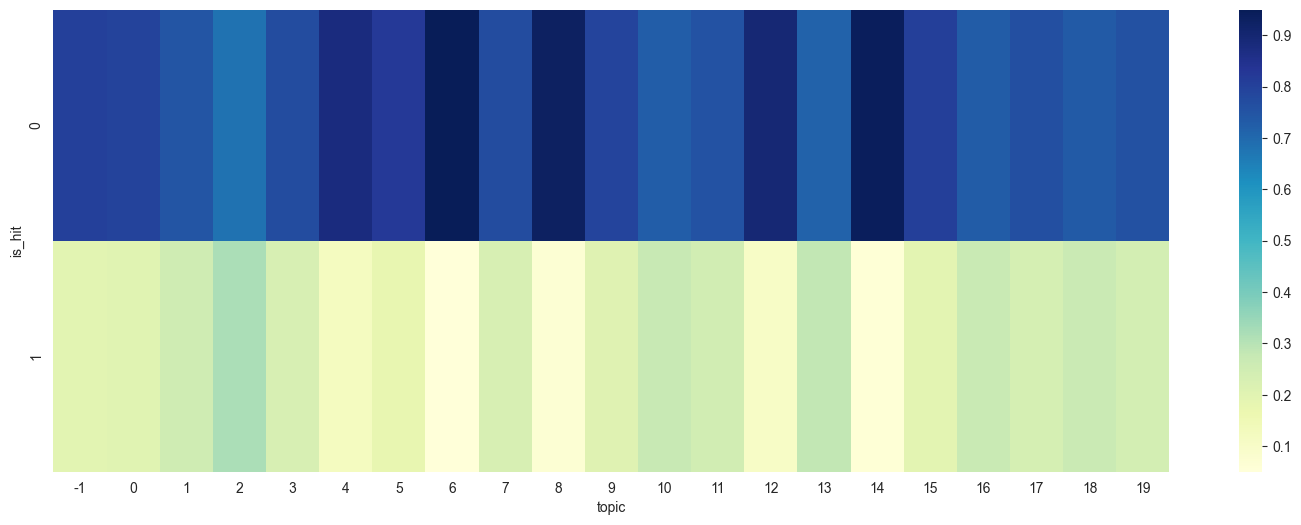

In [40]:
create_heatmap(df_m_topic, 'topic', 'is_hit')

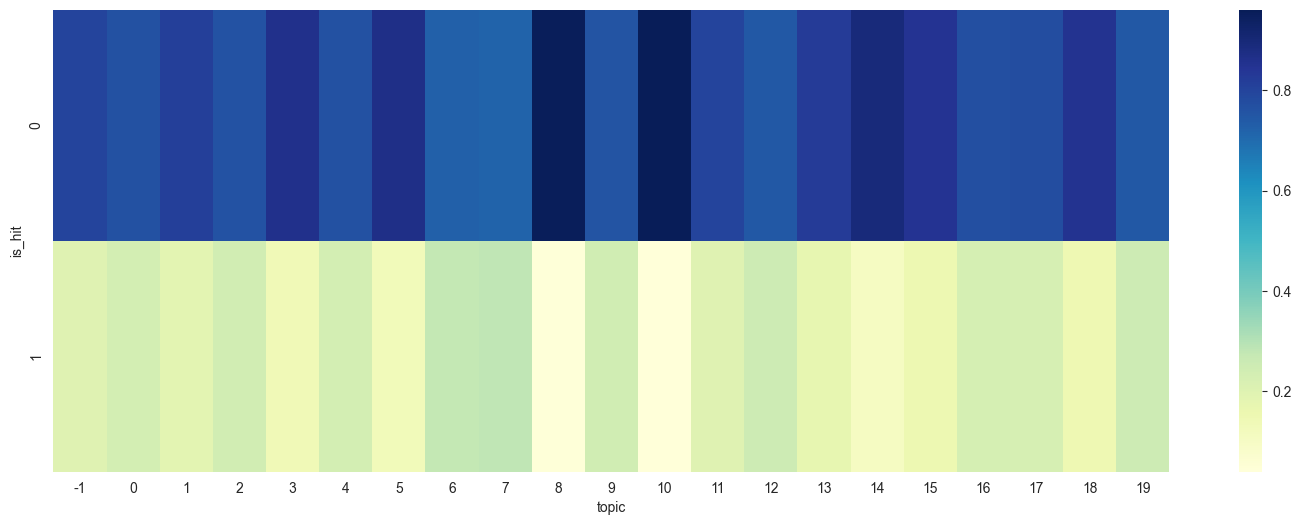

In [41]:
create_heatmap(df_d_topic, 'topic', 'is_hit')

In [42]:
df_d_topic

,imdb_id,topic,rating,num_votes_log,sentiment_score,hit_score,is_hit
0,tt0412175,1,0.689371,0.588480,0.641080,39.147204,0
1,tt0439100,9,0.766313,0.669573,0.542239,43.808518,1
2,tt0772137,19,0.656077,0.471185,0.415665,25.249418,0
3,tt0756509,4,0.710660,0.585792,0.651099,39.885388,0
4,tt0496275,-1,0.655418,0.493400,0.592537,30.787047,0
...,...,...,...,...,...,...,...
3202,tt35836959,2,0.488846,0.397626,0.143166,12.565209,0
3203,tt37504309,13,0.496015,0.390487,0.435624,18.189648,0
3204,tt28243363,1,0.589064,0.413671,0.490812,22.335682,0
3205,tt37370861,3,0.865935,0.459873,0.949848,41.751460,1


In [43]:
df_hm_topic = movie_hit_topic.merge(movie_hit_score, on="imdb_id", how="inner")

In [44]:
df_hd_topic = drama_hit_topic.merge(drama_hit_score, on="imdb_id", how="inner")

<Axes: >

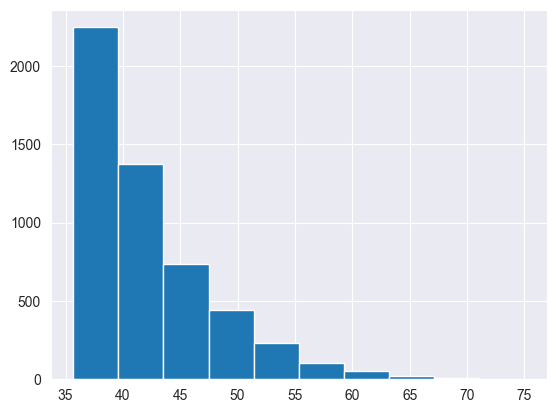

In [45]:
df_hm_topic['hit_score'].hist()

<Axes: xlabel='topic', ylabel='hit_score'>

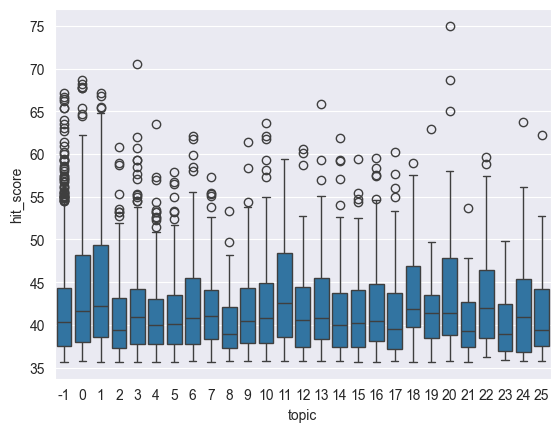

In [46]:
sns.boxplot(data=df_hm_topic, x='topic', y='hit_score')

In [47]:
pre_test(df_hm_topic, 'topic')

등분산성을 만족하지 않음
정규성을 만족하지 않음


In [48]:
round(df_hm_topic['topic'].value_counts() / len(df_hm_topic) * 100, 1)

topic
-1     33.9
 0      7.5
 1      5.2
 2      4.8
 3      4.7
 4      4.4
 5      4.1
 6      4.0
 7      3.2
 8      2.6
 9      2.4
 10     2.1
 11     2.0
 12     2.0
 13     2.0
 14     1.7
 15     1.6
 16     1.6
 18     1.3
 17     1.3
 19     1.2
 20     1.1
 21     1.1
 22     1.1
 23     1.0
 24     1.0
 25     1.0
Name: count, dtype: float64

In [49]:
pre_test(df_hd_topic, 'topic')

등분산성을 만족하지 않음
정규성을 만족하지 않음


In [50]:
k_result = kruskal_test(df_hm_topic, 'topic')

Kruskal-Wallis H 검정: topic → hit_score

그룹 수: 27
전체 샘플: 5,217

 category    n    median      mean      std       min       max
        0  389 41.613966 43.934066 7.407646 35.744320 68.680688
       19   60 41.434130 41.531632 4.354000 35.694130 62.941702
       -1 1769 40.331106 41.710991 5.349945 35.676893 67.085448
       11  106 42.572218 44.022626 6.428531 35.741091 59.459550
       23   54 38.918615 40.188373 3.718555 35.913916 49.843840
        6  207 40.778679 42.325509 5.757261 35.758016 62.113561
        3  247 40.932214 42.044629 5.643733 35.680860 70.528902
       15   86 40.173238 41.477425 5.213972 35.675315 59.378891
       12  106 40.598592 41.742898 5.228456 35.734858 60.556530
        4  227 39.974846 40.951813 4.640149 35.681425 63.476287
       10  111 40.812697 42.767836 6.438337 35.773734 63.601600
       14   91 40.010328 41.542639 5.660794 35.735330 61.916970
       16   83 40.487433 42.340768 5.942738 35.701265 59.572618
        1  271 42.270942 44.678030 7.5922

In [51]:
k_result

{'H': np.float64(119.14091530197186),
 'p_value': np.float64(6.989094982310892e-14),
 'dof': 26,
 'epsilon_squared': np.float64(0.01794622645510055),
 'eta_squared': np.float64(0.022841433148384174),
 'effect_interpretation': '작음 (small)',
 'significant': np.True_,
 'groups': [np.int64(0),
  np.int64(19),
  np.int64(-1),
  np.int64(11),
  np.int64(23),
  np.int64(6),
  np.int64(3),
  np.int64(15),
  np.int64(12),
  np.int64(4),
  np.int64(10),
  np.int64(14),
  np.int64(16),
  np.int64(1),
  np.int64(2),
  np.int64(7),
  np.int64(22),
  np.int64(25),
  np.int64(17),
  np.int64(5),
  np.int64(9),
  np.int64(8),
  np.int64(20),
  np.int64(13),
  np.int64(24),
  np.int64(18),
  np.int64(21)],
 'group_stats':     category     n     median       mean       std        min        max
 0          0   389  41.613966  43.934066  7.407646  35.744320  68.680688
 1         19    60  41.434130  41.531632  4.354000  35.694130  62.941702
 2         -1  1769  40.331106  41.710991  5.349945  35.676893  

In [52]:
k_result = kruskal_test(df_hd_topic, 'topic')

Kruskal-Wallis H 검정: topic → hit_score

그룹 수: 13
전체 샘플: 641

 category   n    median      mean      std       min       max
        0 116 43.910983 45.435755 4.529811 40.220748 61.463387
        2  49 43.864423 45.811763 4.975572 40.473777 62.534969
       -1 174 44.885249 46.402598 5.043577 40.211777 66.374123
        4  34 43.554965 47.178575 6.374281 40.159246 63.251615
        8  16 44.306133 46.736904 7.045107 40.908889 66.691607
        1  80 44.683798 45.545135 4.553381 40.414167 62.463428
        3  46 45.064343 47.234173 6.510349 40.320864 62.741931
        5  32 44.328746 44.539272 3.148477 40.294548 51.926199
        7  20 45.537583 47.604943 7.069403 40.436959 61.542090
       11  15 48.173605 47.744152 5.168651 40.502598 56.096172
        9  16 45.979784 46.916734 4.229135 41.429038 55.029484
       10  16 42.811294 45.404952 5.099544 41.246355 58.684592
        6  27 45.845519 46.863808 5.935916 40.285020 63.423646

--------------------------------------------------------

In [53]:
k_result

{'H': np.float64(9.31902137066254),
 'p_value': np.float64(0.6754672073184645),
 'dof': 12,
 'epsilon_squared': np.float64(-0.004269074250537357),
 'eta_squared': np.float64(0.014560970891660219),
 'effect_interpretation': '무시 가능 (negligible)',
 'significant': np.False_,
 'groups': [np.int64(0),
  np.int64(2),
  np.int64(-1),
  np.int64(4),
  np.int64(8),
  np.int64(1),
  np.int64(3),
  np.int64(5),
  np.int64(7),
  np.int64(11),
  np.int64(9),
  np.int64(10),
  np.int64(6)],
 'group_stats':     category    n     median       mean       std        min        max
 0          0  116  43.910983  45.435755  4.529811  40.220748  61.463387
 1          2   49  43.864423  45.811763  4.975572  40.473777  62.534969
 2         -1  174  44.885249  46.402598  5.043577  40.211777  66.374123
 3          4   34  43.554965  47.178575  6.374281  40.159246  63.251615
 4          8   16  44.306133  46.736904  7.045107  40.908889  66.691607
 5          1   80  44.683798  45.545135  4.553381  40.414167  62.

In [54]:
test_results = pd.DataFrame({
    'Statistic': ['H', 'df', 'p-value', 'ε²', 'η²'],
    'Value': [
        f"{k_result['H']:.3f}",
        k_result['dof'],
        f"{k_result['p_value']:.3f}",
        f"{k_result['epsilon_squared']:.3f}",
        f"{k_result['eta_squared']:.3f}"
    ],
    'Interpretation': [
        '',
        '',
        'Not significant (p > .05)',
        k_result['effect_interpretation'],
        ''
    ]
})

In [55]:
test_results

,Statistic,Value,Interpretation
0,H,9.319,
1,df,12,
2,p-value,0.675,Not significant (p > .05)
3,ε²,-0.004,무시 가능 (negligible)
4,η²,0.015,


In [56]:
test_results.to_csv('results.csv', index=False)

In [57]:
review_topic = pd.read_parquet("files/final_files/embedding/review_topic_keyword.parquet")

In [58]:
review_topic.groupby(['topic_id', 'topic_keywords']).size().reset_index()

,topic_id,topic_keywords,0
0,-1,(outliers),150047
1,0,"shark, bruce, willis, cage, bruce willis, seag...",70390
2,1,"zombie, zombies, gore, vampire, horror movies,...",15796
3,2,"snow, snow white, animation, godzilla, avatar,...",11670
4,3,"trek, star trek, breaking bad, thrones, reboot...",11520
5,4,"batman, superman, marvel, spiderman, superhero...",9970
6,5,"christmas, hallmark, santa, holiday, porn, swa...",7074
7,6,"indian, india, bollywood, khan, 1971, liberati...",6134
8,7,"french, russian, spanish, turkish, italian, su...",5804
9,8,"chinese, korean, kim, china, chan, martial, ja...",2548
